In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

In [35]:
# iris = datasets.load_iris()
from sklearn.datasets import load_iris
df = load_iris().data
y = load_iris().target
print("Dataset loaded successfully")
     

Dataset loaded successfully


In [37]:
#Creating data frame 
df = pd.DataFrame(iris.data, columns = iris.feature_names)

#Top values of Dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
#Bottom Values of Dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [41]:
df.shape
     

(150, 4)

In [43]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [45]:
df.isna().sum()  ##missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [49]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

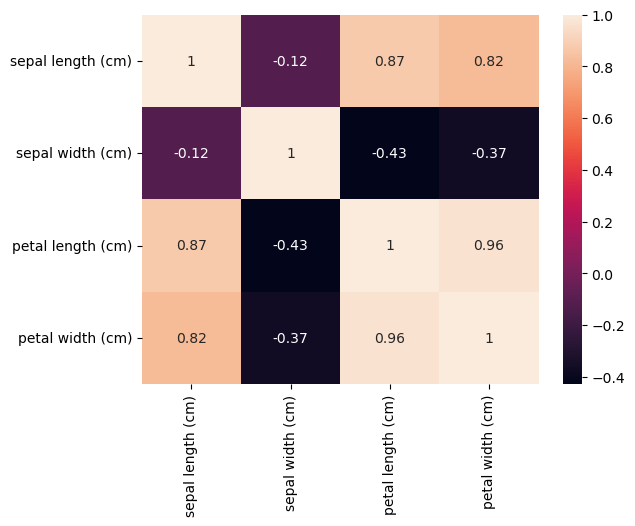

In [51]:
sns.heatmap(df.corr(), annot = True, linecolor='black')

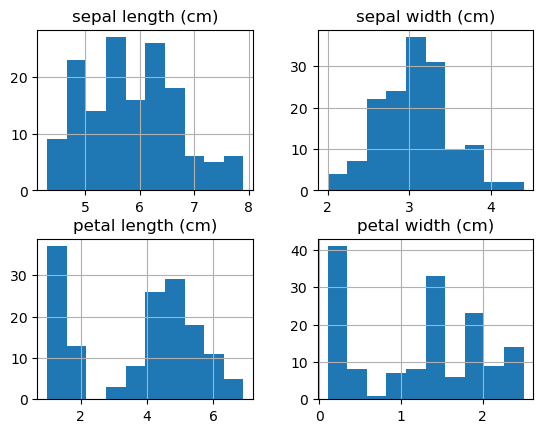

In [53]:
df.hist()
plt.show()

In [33]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [55]:
df['Type']=y

In [57]:
df['Type'].value_counts()

Type
0    50
1    50
2    50
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x = sc.fit_transform(df)

In [61]:
pd.DataFrame(y).head()

,0
0,0
1,0
2,0
3,0
4,0


<Axes: ylabel='count'>

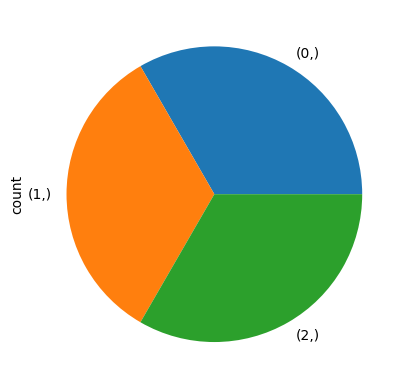

In [63]:
pd.DataFrame(y).value_counts().plot(kind='pie')

In [67]:
import warnings
warnings.filterwarnings('ignore')

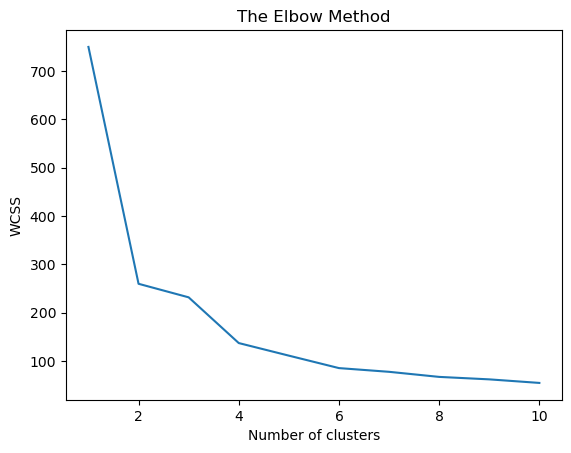

In [68]:
#SCREE Plot
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [79]:
kmeans.cluster_centers_
     

array([[ 0.01256556, -0.76288913,  0.32279448,  0.22757742,  0.15876322],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349, -1.22474487],
       [ 1.08805236, -0.03189393,  1.03953183,  1.09685856,  1.14487021]])

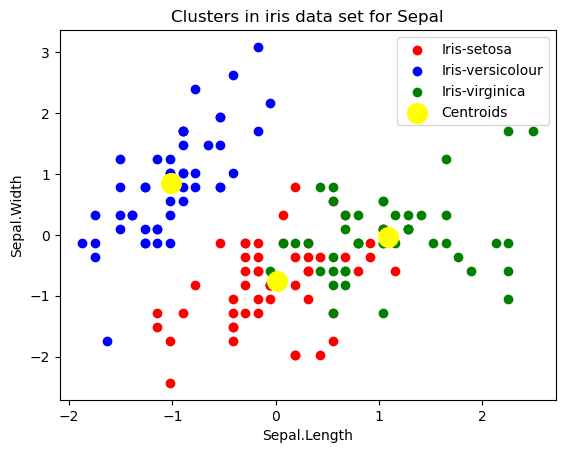

In [93]:
#Visualizing clusters for sepal
# plt.figure(15)
# plt.figure(7)
# plt.subplot(221)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='green',label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')
plt.title('Clusters in iris data set for Sepal')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend()

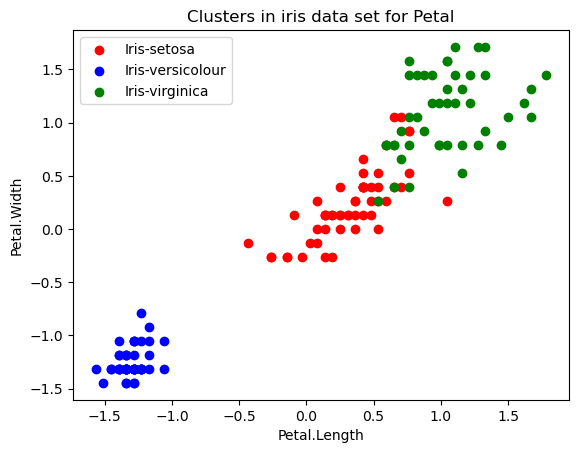

In [101]:
#Visualizing clusters for petal
# plt.subplot(222)
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],c='red',label = 'Iris-setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],c='blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],c='green',label='Iris-virginica')
plt.title('Clusters in iris data set for Petal')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()

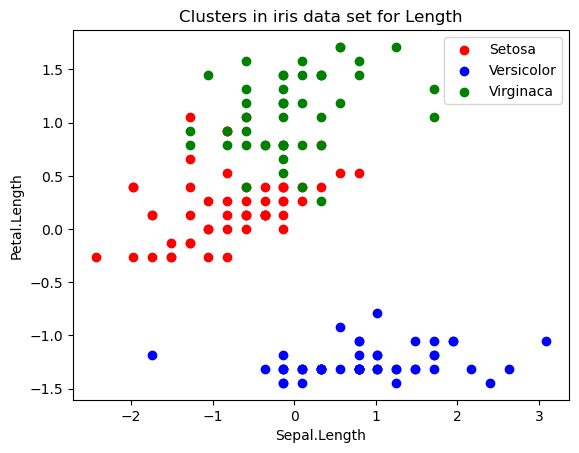

In [105]:
#Visualizing clusters for sepal.length and petal.length
# plt.subplot(223)
plt.scatter(x[y_kmeans==0,1],x[y_kmeans==0,3],c='red',label='Setosa')
plt.scatter(x[y_kmeans==1,1],x[y_kmeans==1,3],c='blue',label='Versicolor')
plt.scatter(x[y_kmeans==2,1],x[y_kmeans==2,3],c='green',label='Virginaca')
plt.title('Clusters in iris data set for Length')
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')
plt.legend()

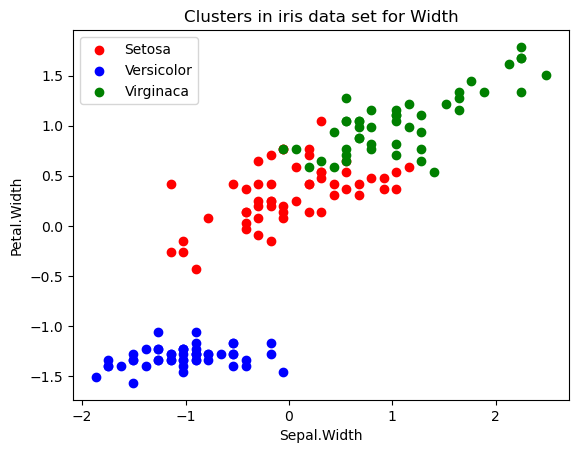

In [115]:
#Visualizing clusters for sepal.width and petal.width
# plt.subplot(224)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,2],c='red',label='Setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,2],c='blue',label='Versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,2],c='green',label='Virginaca')
plt.title('Clusters in iris data set for Width')
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Width')
# plt.show()
plt.legend()

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_kmeans)

0.2866666666666667

In [119]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_kmeans)

0.477178745137644